In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from matplotlib.dates import DateFormatter
%config InlineBackend.figure_format='retina'
plt.style.use('seaborn-dark')
sns.set_style('darkgrid')
from IPython.display import display
import matplotlib.patches as mpatches

## Acronyms
- POW - Prisoner of War,
- MRL - Multiple Rocket Launcher,
- APC - Armored Personnel Carrier,
- SRBM - Short-range ballistic missile,
- drones:
- UAV - Unmanned Aerial Vehicle,
- RPA - Remotely Piloted Vehicle.

In [2]:
accrued_eqpt = pd.read_csv('datasets/russia_losses_equipment.csv')
accrued_per = pd.read_csv('datasets/russia_losses_personnel.csv')


In [3]:
df_accrued = pd.merge(accrued_eqpt, accrued_per, how='inner', on = 'day')
df_accrued['date'] = df_accrued['date_x']
df_accrued.drop(columns=['date_y', 'date_x'], inplace=True)

In [4]:
df_accrued['date'] = df_accrued['date'].apply(lambda x: dt.datetime(int(str(x)[:4]), int(str(x)[5:7]),int(str(x)[8:])))
display(df_accrued.info())
display(df_accrued.describe())
df_accrued.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   day                    58 non-null     int64         
 1   aircraft               58 non-null     int64         
 2   helicopter             58 non-null     int64         
 3   tank                   58 non-null     int64         
 4   APC                    58 non-null     int64         
 5   field artillery        58 non-null     int64         
 6   MRL                    58 non-null     int64         
 7   military auto          58 non-null     int64         
 8   fuel tank              58 non-null     int64         
 9   drone                  58 non-null     int64         
 10  naval ship             58 non-null     int64         
 11  anti-aircraft warfare  58 non-null     int64         
 12  special equipment      39 non-null     float64       
 13  mobile 

None

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,POW
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,39.000000,29.000000,58.000000,58.000000
mean,30.500000,106.827586,107.758621,524.551724,1530.551724,247.034483,83.758621,975.379310,68.517241,63.758621,5.051724,43.620690,21.615385,3.931034,15127.862069,379.189655
std,16.886879,50.926896,41.430691,213.055315,444.485556,112.877976,35.337625,440.968186,7.602496,58.259044,2.357686,19.817437,5.570672,0.371391,4905.255025,132.933364
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,2800.000000,0.000000
25%,16.250000,57.250000,83.000000,355.250000,1175.000000,127.500000,59.000000,564.750000,60.000000,7.000000,3.000000,31.500000,18.500000,4.000000,12000.000000,389.000000
50%,30.500000,116.000000,126.000000,568.000000,1632.500000,292.000000,90.500000,1110.000000,72.500000,54.500000,6.000000,50.000000,25.000000,4.000000,16250.000000,412.000000
75%,44.750000,150.750000,135.750000,703.750000,1894.000000,334.500000,108.000000,1362.500000,76.000000,112.000000,7.000000,55.000000,25.000000,4.000000,19075.000000,467.000000
max,59.000000,177.000000,154.000000,854.000000,2205.000000,403.000000,143.000000,1543.000000,76.000000,182.000000,8.000000,69.000000,27.000000,4.000000,21600.000000,489.000000


,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,personnel,personnel*,POW,date
0,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN,2800,about,0,2022-02-25
1,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN,4300,about,0,2022-02-26
2,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN,4500,about,0,2022-02-27
3,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN,5300,about,0,2022-02-28
4,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN,5710,about,200,2022-03-01


In [5]:
df_accrued.isnull().sum()

day                       0
aircraft                  0
helicopter                0
tank                      0
APC                       0
field artillery           0
MRL                       0
military auto             0
fuel tank                 0
drone                     0
naval ship                0
anti-aircraft warfare     0
special equipment        19
mobile SRBM system       29
personnel                 0
personnel*                0
POW                       0
date                      0
dtype: int64

In [6]:
df_accrued['total days'] = df_accrued['day']
df_accrued.drop(columns=['day', 'special equipment', 'mobile SRBM system', 'personnel*'], inplace=True)
df_accrued['weekday'] = df_accrued['date'].dt.day_name()

In [7]:
df_accrued.head(4)

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,personnel,POW,date,total days,weekday
0,10,7,80,516,49,4,100,60,0,2,0,2800,0,2022-02-25,2,Friday
1,27,26,146,706,49,4,130,60,2,2,0,4300,0,2022-02-26,3,Saturday
2,27,26,150,706,50,4,130,60,2,2,0,4500,0,2022-02-27,4,Sunday
3,29,29,150,816,74,21,291,60,3,2,5,5300,0,2022-02-28,5,Monday


In [8]:
full_week = 7
week_of_day = {}
curr_week = 1
for day in df_accrued['total days']:
    if day <= full_week:
        week_of_day[day] = f'wk {curr_week}'
    else:
        week_of_day[day] = f'wk {curr_week}'
        curr_week += 1
        full_week += 7
        
df_accrued['week'] = week_of_day.values()

In [9]:
df_accrued.set_index(['date'], inplace=True)
df_accrued.columns

Index(['aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL',
       'military auto', 'fuel tank', 'drone', 'naval ship',
       'anti-aircraft warfare', 'personnel', 'POW', 'total days', 'weekday',
       'week'],
      dtype='object')

In [10]:
df_accrued.columns = ['Aircraft', 'Helicopter', 'Tank', 'APC', 'Field_artillery','MRL', 'Military_auto', 'Fuel_tank', 'Drone', 'Naval_ship',
       'Anti-aircraft_warfare', 'Personnel', 'POW', 'Total_days', 'Weekday', 'Week']

df_accrued.head(4)

,Aircraft,Helicopter,Tank,APC,Field_artillery,MRL,Military_auto,Fuel_tank,Drone,Naval_ship,Anti-aircraft_warfare,Personnel,POW,Total_days,Weekday,Week
date,,,,,,,,,,,,,,,,
2022-02-25,10,7,80,516,49,4,100,60,0,2,0,2800,0,2,Friday,wk 1
2022-02-26,27,26,146,706,49,4,130,60,2,2,0,4300,0,3,Saturday,wk 1
2022-02-27,27,26,150,706,50,4,130,60,2,2,0,4500,0,4,Sunday,wk 1
2022-02-28,29,29,150,816,74,21,291,60,3,2,5,5300,0,5,Monday,wk 1


In [11]:
df_daily = df_accrued.copy()
df_daily.drop(columns='Total_days', inplace=True)
for col in df_daily.columns[:-2]:
    df_daily[col] = df_daily[col].diff()
    df_daily[col][0] = df_accrued[col][0]
    df_daily[col] = df_daily[col].apply(lambda x: int(x) if not pd.isnull(x) else None)
df_daily.head(4)

/var/folders/fz/5_xsrs6x22zbrnf37wb5hqbw0000gn/T/ipykernel_40881/2350860760.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily[col][0] = df_accrued[col][0]


,Aircraft,Helicopter,Tank,APC,Field_artillery,MRL,Military_auto,Fuel_tank,Drone,Naval_ship,Anti-aircraft_warfare,Personnel,POW,Weekday,Week
date,,,,,,,,,,,,,,,
2022-02-25,10,7,80,516,49,4,100,60,0,2,0,2800,0,Friday,wk 1
2022-02-26,17,19,66,190,0,0,30,0,2,0,0,1500,0,Saturday,wk 1
2022-02-27,0,0,4,0,1,0,0,0,0,0,0,200,0,Sunday,wk 1
2022-02-28,2,3,0,110,24,17,161,0,1,0,5,800,0,Monday,wk 1


In [12]:
df_daily[df_daily['Week'] == 'wk 3']

,Aircraft,Helicopter,Tank,APC,Field_artillery,MRL,Military_auto,Fuel_tank,Drone,Naval_ship,Anti-aircraft_warfare,Personnel,POW,Weekday,Week
date,,,,,,,,,,,,,,,
2022-03-11,8,2,18,60,2,2,32,0,0,0,2,0,18,Friday,wk 3
2022-03-12,1,0,9,40,10,4,27,0,0,0,2,0,0,Saturday,wk 3
2022-03-13,16,3,12,21,5,0,15,0,0,0,1,0,0,Sunday,wk 3
2022-03-14,3,4,15,23,10,2,17,0,1,0,0,0,0,Monday,wk 3
2022-03-15,4,5,15,30,0,0,23,0,1,0,2,1500,0,Tuesday,wk 3
2022-03-16,3,13,26,96,40,6,179,0,2,0,7,300,0,Wednesday,wk 3
2022-03-17,2,0,14,60,11,2,45,0,0,0,0,200,16,Thursday,wk 3


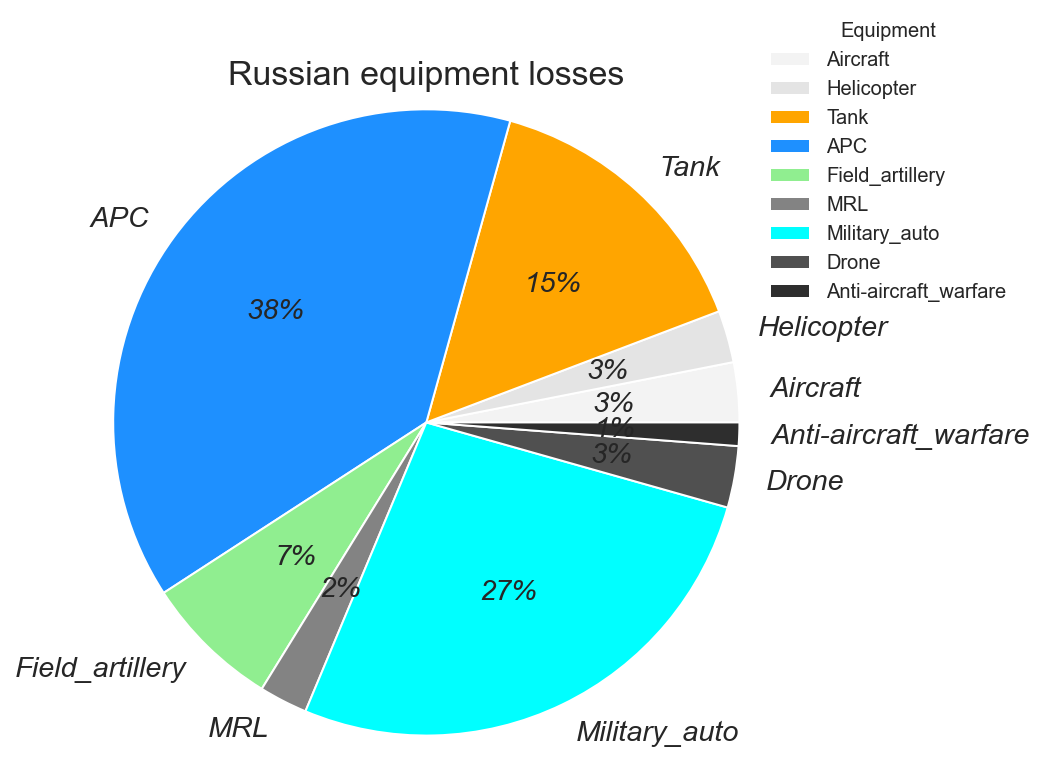

In [14]:
from matplotlib import font_manager as fm

df_daily_eqpt_sum = df_daily[df_daily.columns[:-4]].copy()
sum_vals = {}
for col in df_daily_eqpt_sum:
    if col not in ['Fuel_tank', 'Naval_ship']:
        sum_vals[col] = sum(df_daily_eqpt_sum[col])
cmap = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.1, 0.85, len(sum_vals))))
colors[3] = 'dodgerblue'
colors[6] = 'aqua'
colors[2] = 'orange'
colors[4] = 'lightgreen'
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))
patches, texts, autotexts = plt.pie(x = sum_vals.values(), labels = sum_vals.keys(), autopct = "%.0f%%", radius=1.2, labeldistance=1.1, colors=colors);

proptease = fm.FontProperties(style='oblique')
proptease.set_size('x-large')
plt.setp(autotexts, fontproperties=proptease)
plt.setp(texts, fontproperties=proptease);
plt.title('Russian equipment losses', fontsize=17, loc='center');
ax.legend(
          title="Equipment",
          loc="center left",
          bbox_to_anchor=(1, .4, 0, 1));

### Overall outlook of all the data for daily and accumulated losses

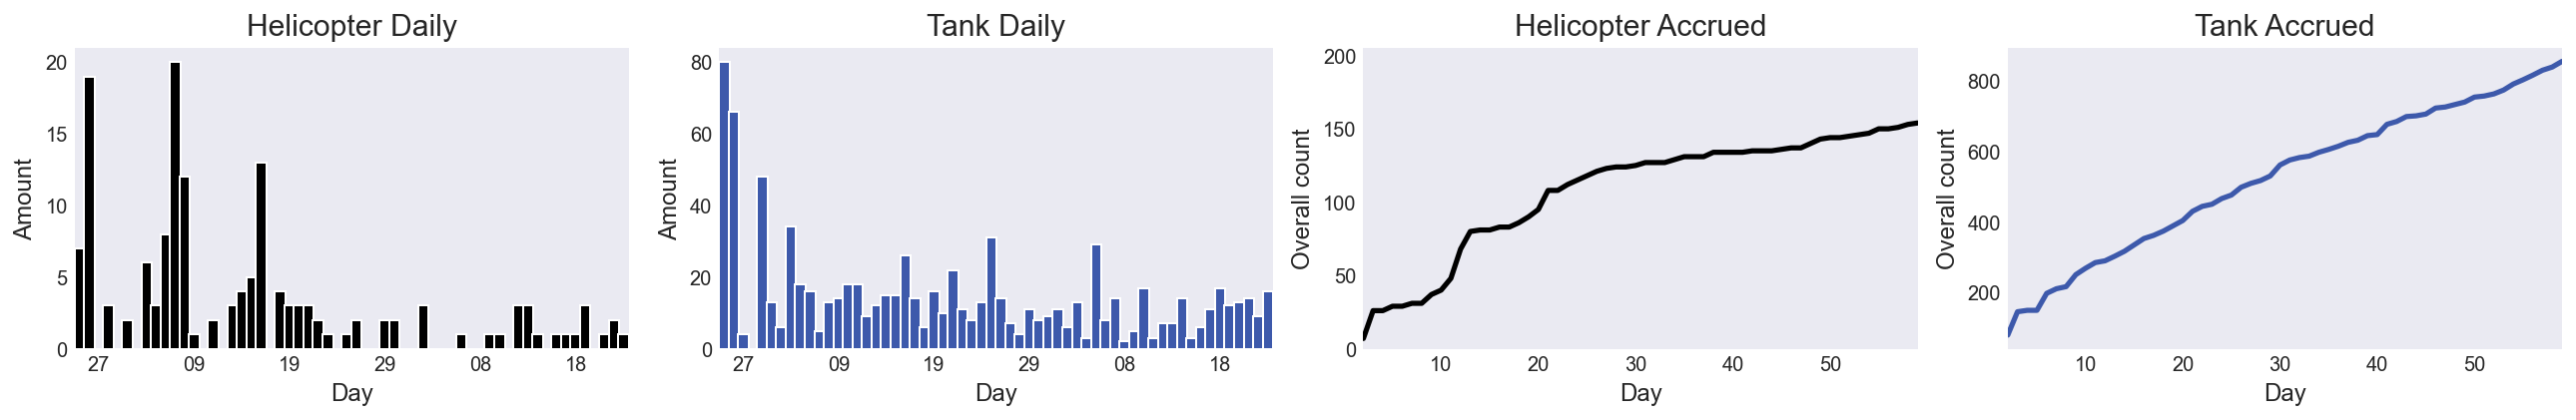

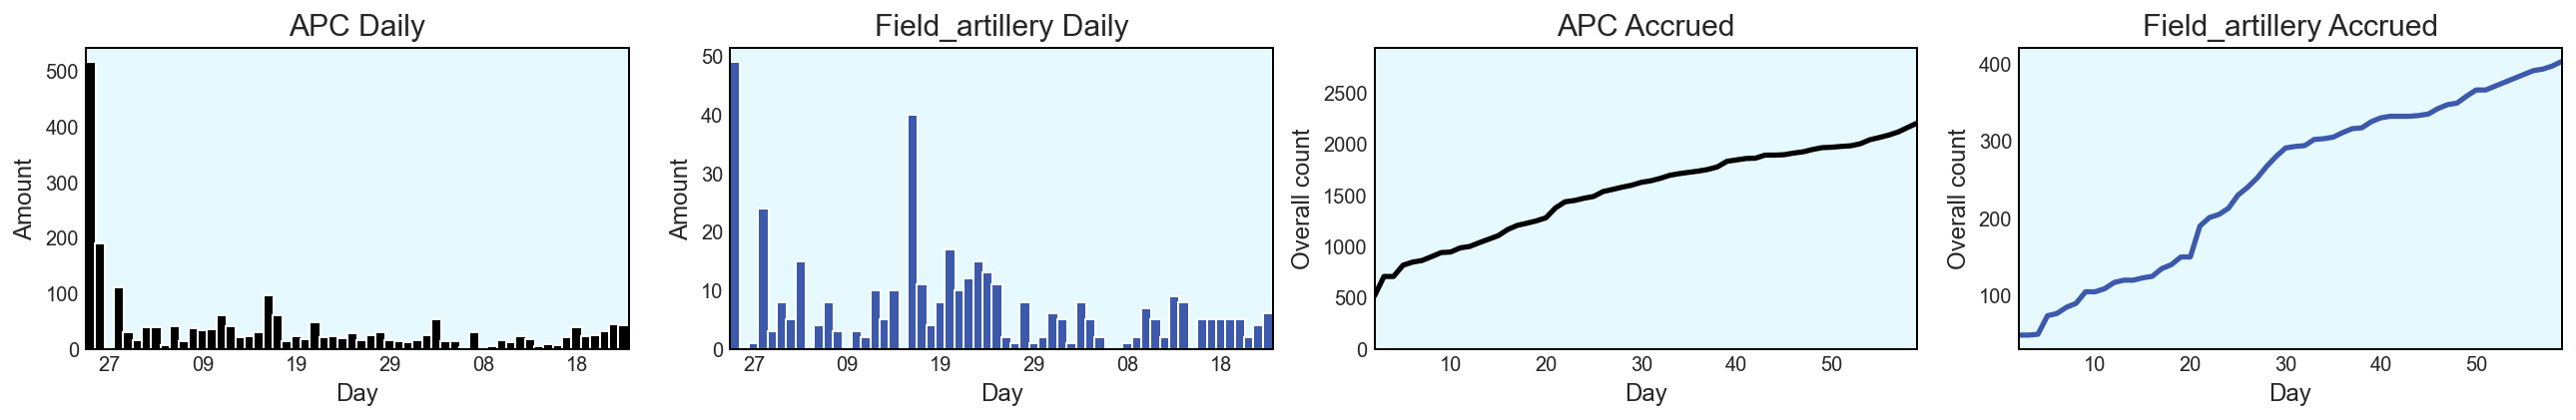

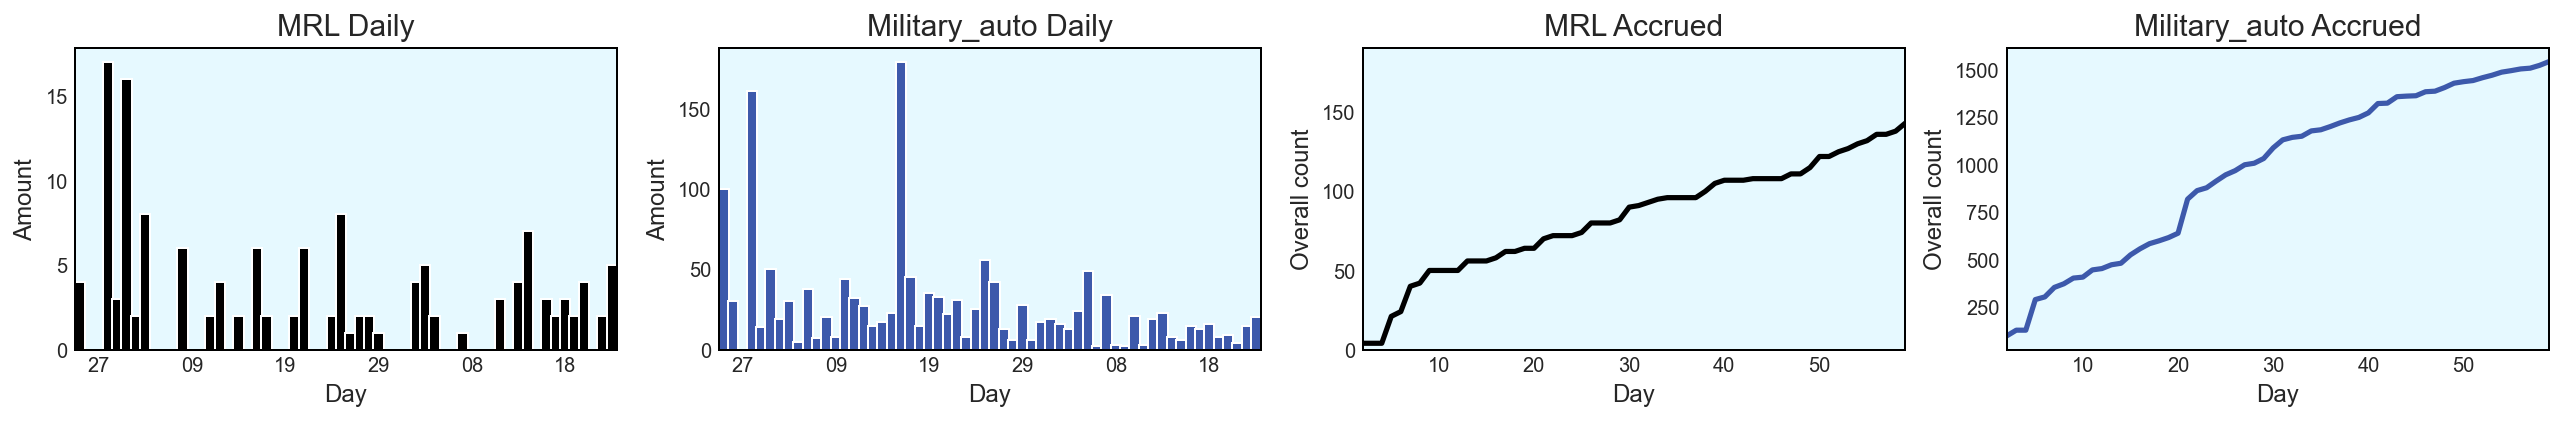

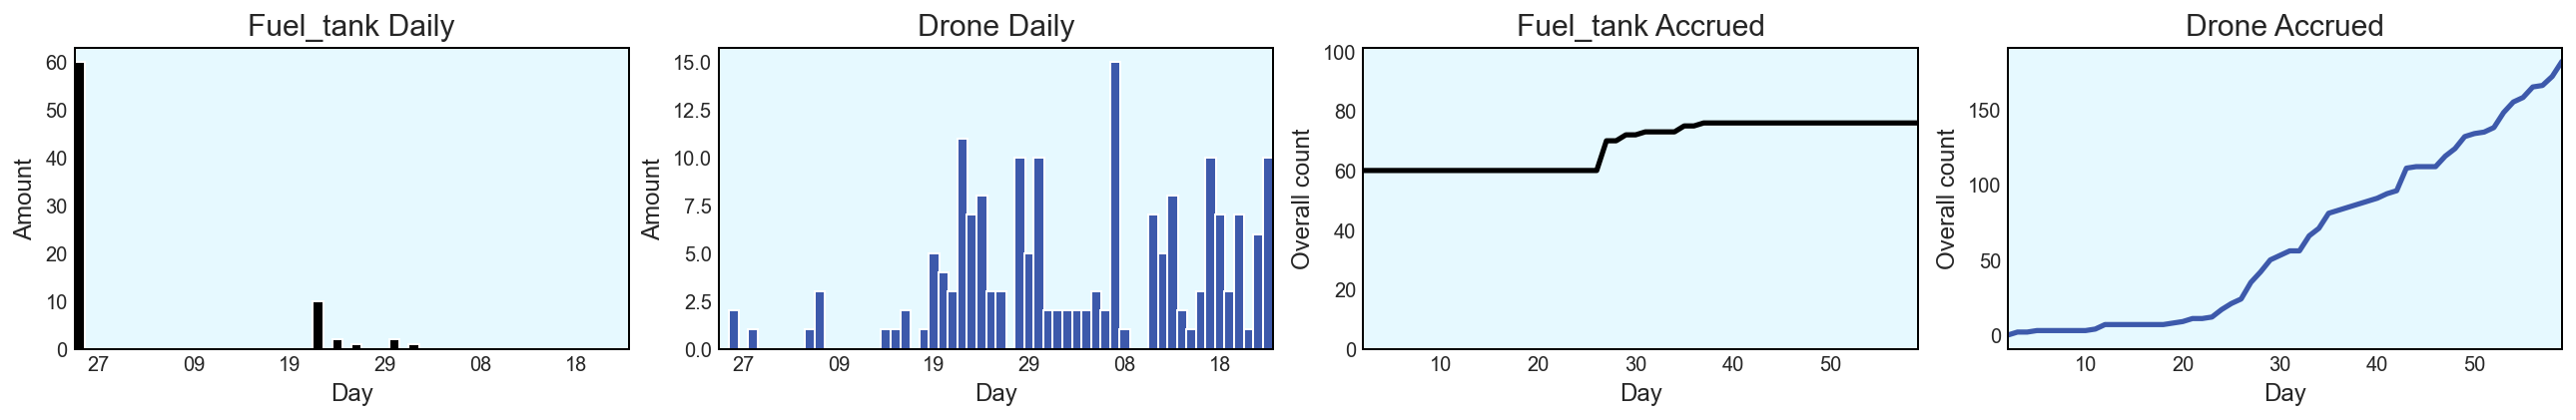

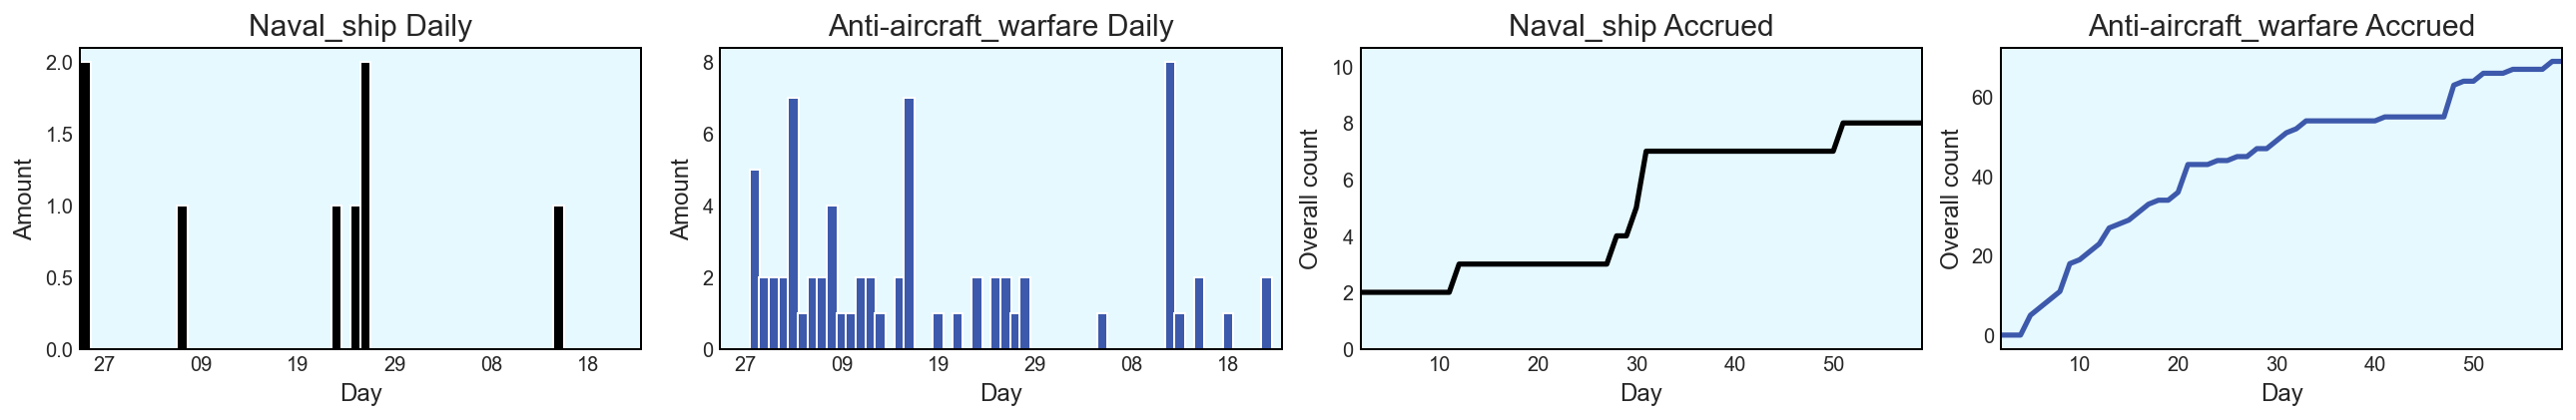

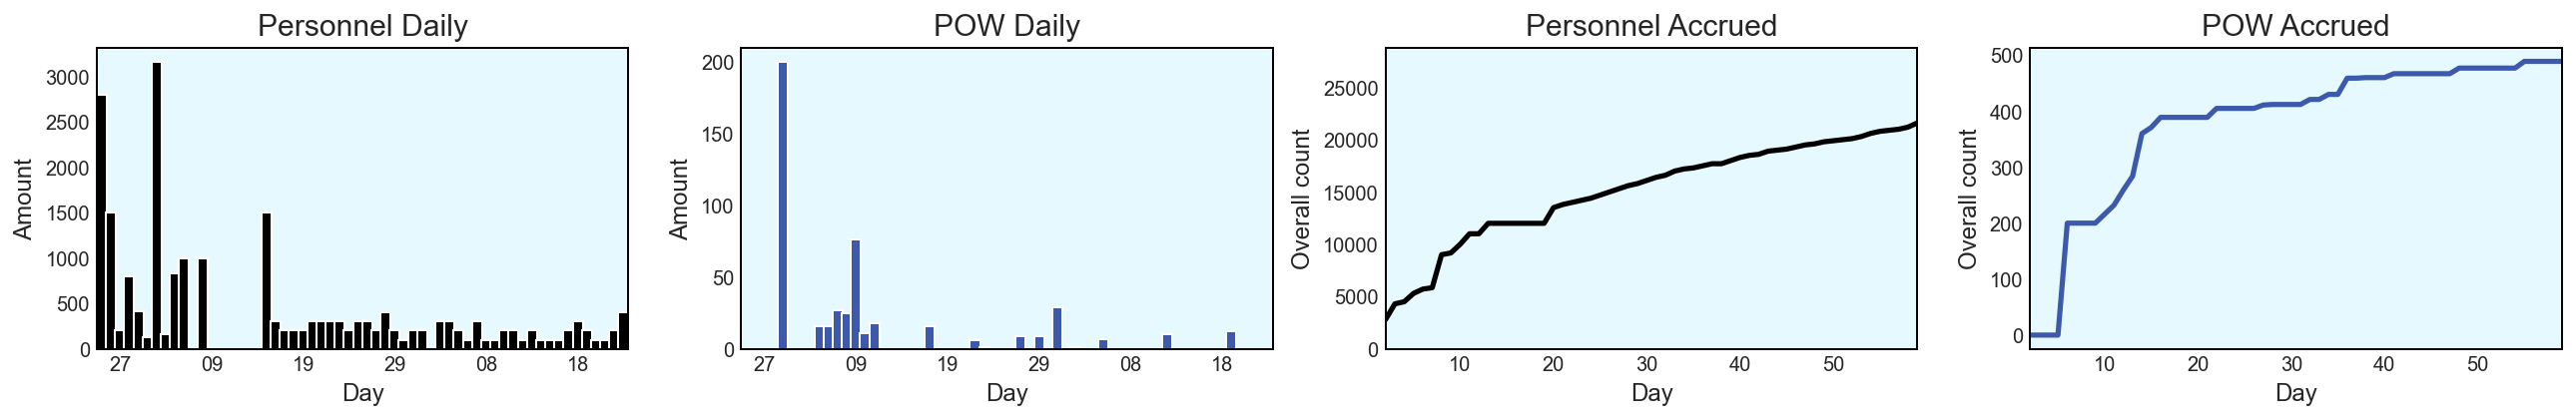

In [15]:

for i in range(len(df_daily.columns[:-3])):
    if i % 2 != 0:
        fig, ax = plt.subplots(1, 4, figsize=(18,3))
        
        # Plotting the data into their respective index
        col_1_x = df_daily[df_daily.columns[i]].index
        col_1_y = df_daily[df_daily.columns[i]].values
        col_1_acc_x = df_accrued["Total_days"].values
        col_1_acc_y = df_accrued[[df_accrued.columns[i]]].values
        
        col_2_x = df_daily[df_daily.columns[i+1]].index
        col_2_y = df_daily[df_daily.columns[i+1]].values
        col_2_acc_x = df_accrued["Total_days"].values
        col_2_acc_y = df_accrued[[df_accrued.columns[i+1]]].values
        
        # Individual chart configuration in 1x4 matrix
        ax[0].bar(col_1_x, col_1_y, color='black', width=1.1)
        ax[0].set_title(str(df_daily.columns[i]) + ' Daily', fontsize=15)
        ax[1].bar(col_2_x, col_2_y, color='#3D59AB', width=1.1)
        ax[1].set_title(str(df_daily.columns[i+1]) + ' Daily', fontsize=15)
        ax[2].plot(col_1_acc_x, col_1_acc_y, linewidth=2.6, color='black')
        ax[2].set_title(str(df_daily.columns[i]) +' Accrued', fontsize=15)
        ax[2].set_ylim(0, max(col_1_acc_y) / 0.75)
        ax[3].plot(col_2_acc_x, col_2_acc_y, linewidth=2.6, color='#3D59AB')
        ax[3].set_title(str(df_daily.columns[i+1]) +' Accrued', fontsize=15)
        
        for j in range(4):
            ax[j].tick_params(axis='x', labelsize=10)
            ax[j].tick_params(axis='y', labelsize=10)
            ax[j].set_xlabel('Day', fontsize=12)
            ax[j].grid(None)
            ax[j].margins(x=0)
    
            if j >= 2:
                ax[j].set_ylabel('Overall count', fontsize=12)
                ax[j].xaxis.set_major_locator(plt.MaxNLocator(7))
            else:
                ax[j].set_ylabel('Amount', fontsize=12)
                ax[j].xaxis.set_major_locator(plt.MaxNLocator(7))
                ax[j].xaxis.set_major_formatter(DateFormatter("%d"))
                
        #Figure formatting
        # .set_facecolor('xkcd:salmon')
        plt.rcParams['axes.facecolor']='#e6f9ff'
        plt.rcParams['axes.edgecolor'] = "black"
        plt.rcParams['axes.linewidth'] = 1
        fig.tight_layout()

There are interesting observations to be made here. In this analysis I will be examining intriguing findings mainly based on this examination.

It is important to keep in mind that in some plots including "Fuel_Tank" and "Naval_ship", the flat line shown their respective Accrued-line-plot indicates that no new losses have been reported, seeing as these do not go into a negative slope.

### Exploring Tank's and Helicopter losses in a week by week basis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


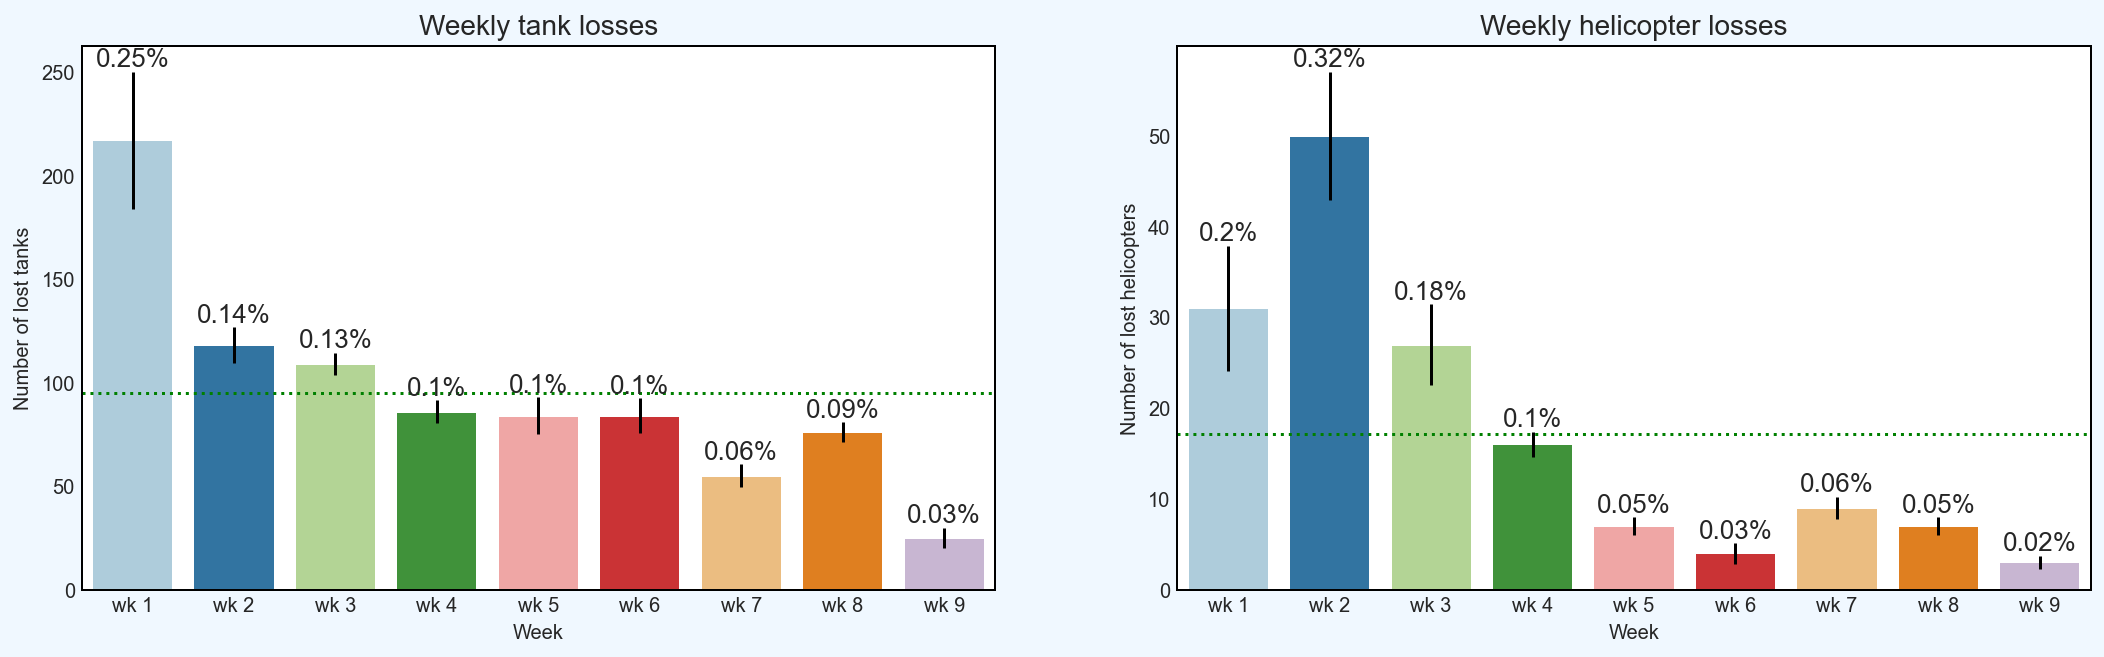

In [16]:
tanks_sum = df_daily[['Tank', 'Week']].groupby(['Week']).sum()
tanks_stdv = df_daily[['Tank', 'Week']].groupby(['Week']).std()
tanks_daily = pd.merge(tanks_sum, tanks_stdv, left_index=True, right_index=True)
tanks_daily.columns = ['Lost_Tanks', 'Standard Deviation']
tanks_daily['Loss_Pct'] = tanks_daily['Lost_Tanks'].apply(lambda x: round(x / tanks_daily['Lost_Tanks'].sum(), 2) if x > 0 else None)
tanks_daily['Loss_Pct'] = tanks_daily['Loss_Pct'].apply(lambda x: str(float(x)) + "%")

helic_sum = df_daily[['Helicopter', 'Week']].groupby(['Week']).sum()
helic_stdv = df_daily[['Helicopter', 'Week']].groupby(['Week']).std()
helic_daily = pd.merge(helic_sum, helic_stdv, left_index=True, right_index=True)
helic_daily.columns = ['Lost_Helicopters', 'Standard Deviation']
helic_daily['Loss_Pct'] = helic_daily['Lost_Helicopters'].apply(lambda x: round(x / helic_daily['Lost_Helicopters'].sum(), 2) if x > 0 else None)
helic_daily['Loss_Pct'] = helic_daily['Loss_Pct'].apply(lambda x: str(float(x)) + "%")

fig_tank_heli, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 5), facecolor='aliceblue')

tanksChart = sns.barplot(x= tanks_daily.index, y=tanks_daily['Lost_Tanks'], yerr= tanks_daily['Standard Deviation'], palette='Paired', ax=ax1)
tanksChart.bar_label(labels = tanks_daily['Loss_Pct'], container = tanksChart.containers[1], fontsize=13);
tanksChart.axhline(tanks_daily['Lost_Tanks'].mean(), linestyle=':', color='green')
tanksChart.set_title('Weekly tank losses', fontsize=14)
tanksChart.set_ylabel('Number of lost tanks')
tanksChart.set_facecolor('white')

helicChart = sns.barplot(x= helic_daily.index, y=helic_daily['Lost_Helicopters'], yerr= helic_daily['Standard Deviation'], palette='Paired', ax=ax2)
helicChart.bar_label(labels = helic_daily['Loss_Pct'], container = helicChart.containers[1], fontsize=13);
helicChart.axhline(helic_daily['Lost_Helicopters'].mean(), linestyle=':', color='green')
helicChart.set_title('Weekly helicopter losses', fontsize=14)
helicChart.set_ylabel('Number of lost helicopters');
helicChart.set_facecolor('white')

helicChart.legend()

### Fuel Tank loss bar graph

/Users/jognvz/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


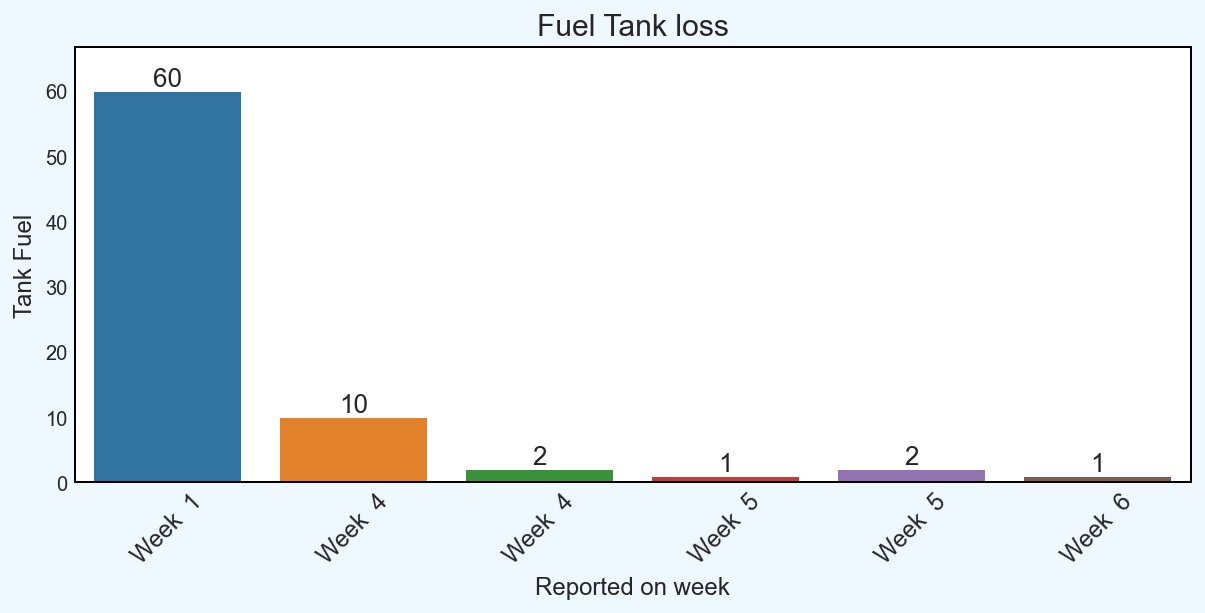

In [17]:
plt.figure(figsize=(10,4), facecolor='aliceblue')
ax = plt.axes()
y_fuel = df_daily[['Fuel_tank', 'Week']][df_daily['Fuel_tank'] > 0 ]
x_fuel = [str(x)[:10] for x in y_fuel.index]
fuel_chart = sns.barplot(x_fuel, y_fuel['Fuel_tank'])
plt.xticks(rotation=45);
fuel_chart.bar_label(labels = y_fuel['Fuel_tank'], container = fuel_chart.containers[0], fontsize=13);
plt.title('Fuel Tank loss', fontsize=15)
ax.set_ylim(0, max(y_fuel['Fuel_tank']) / 0.90)
ax.get_xticklabels
xticks_input = ['Week '+ str(y[-2:]) for y in y_fuel['Week']]
ax.set_ylabel('Tank Fuel', fontsize=12)
ax.set_xlabel('Reported on week', fontsize=12)
ax.set_xticklabels(xticks_input, fontsize=12);
ax.set_facecolor('white')

In [18]:
# Preparing data for weekly inspection of equipment and personnel loss
df_weekday = df_daily.copy()
df_weekday.set_index(['Weekday'], inplace=True)
weekday_sum_eqpt = df_daily.iloc[:,:11].groupby(df_weekday.index).sum()
weekday_sum_psnl = df_daily.iloc[:,11:].groupby(df_weekday.index).sum()
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sum_eqpt['Day_name'] = pd.Categorical(weekday_sum_eqpt.index, categories=cats, ordered=True)
weekday_sum_eqpt = weekday_sum_eqpt.sort_values('Day_name')
weekday_sum_eqpt.drop(columns=['Day_name'], inplace=True)
weekday_sum_psnl['Day_name'] = pd.Categorical(weekday_sum_psnl.index, categories=cats, ordered=True)
weekday_sum_psnl = weekday_sum_psnl.sort_values('Day_name')
weekday_sum_psnl.drop(columns=['Day_name'], inplace=True)

### Inspecting accumulated losses for all equipment on each week day

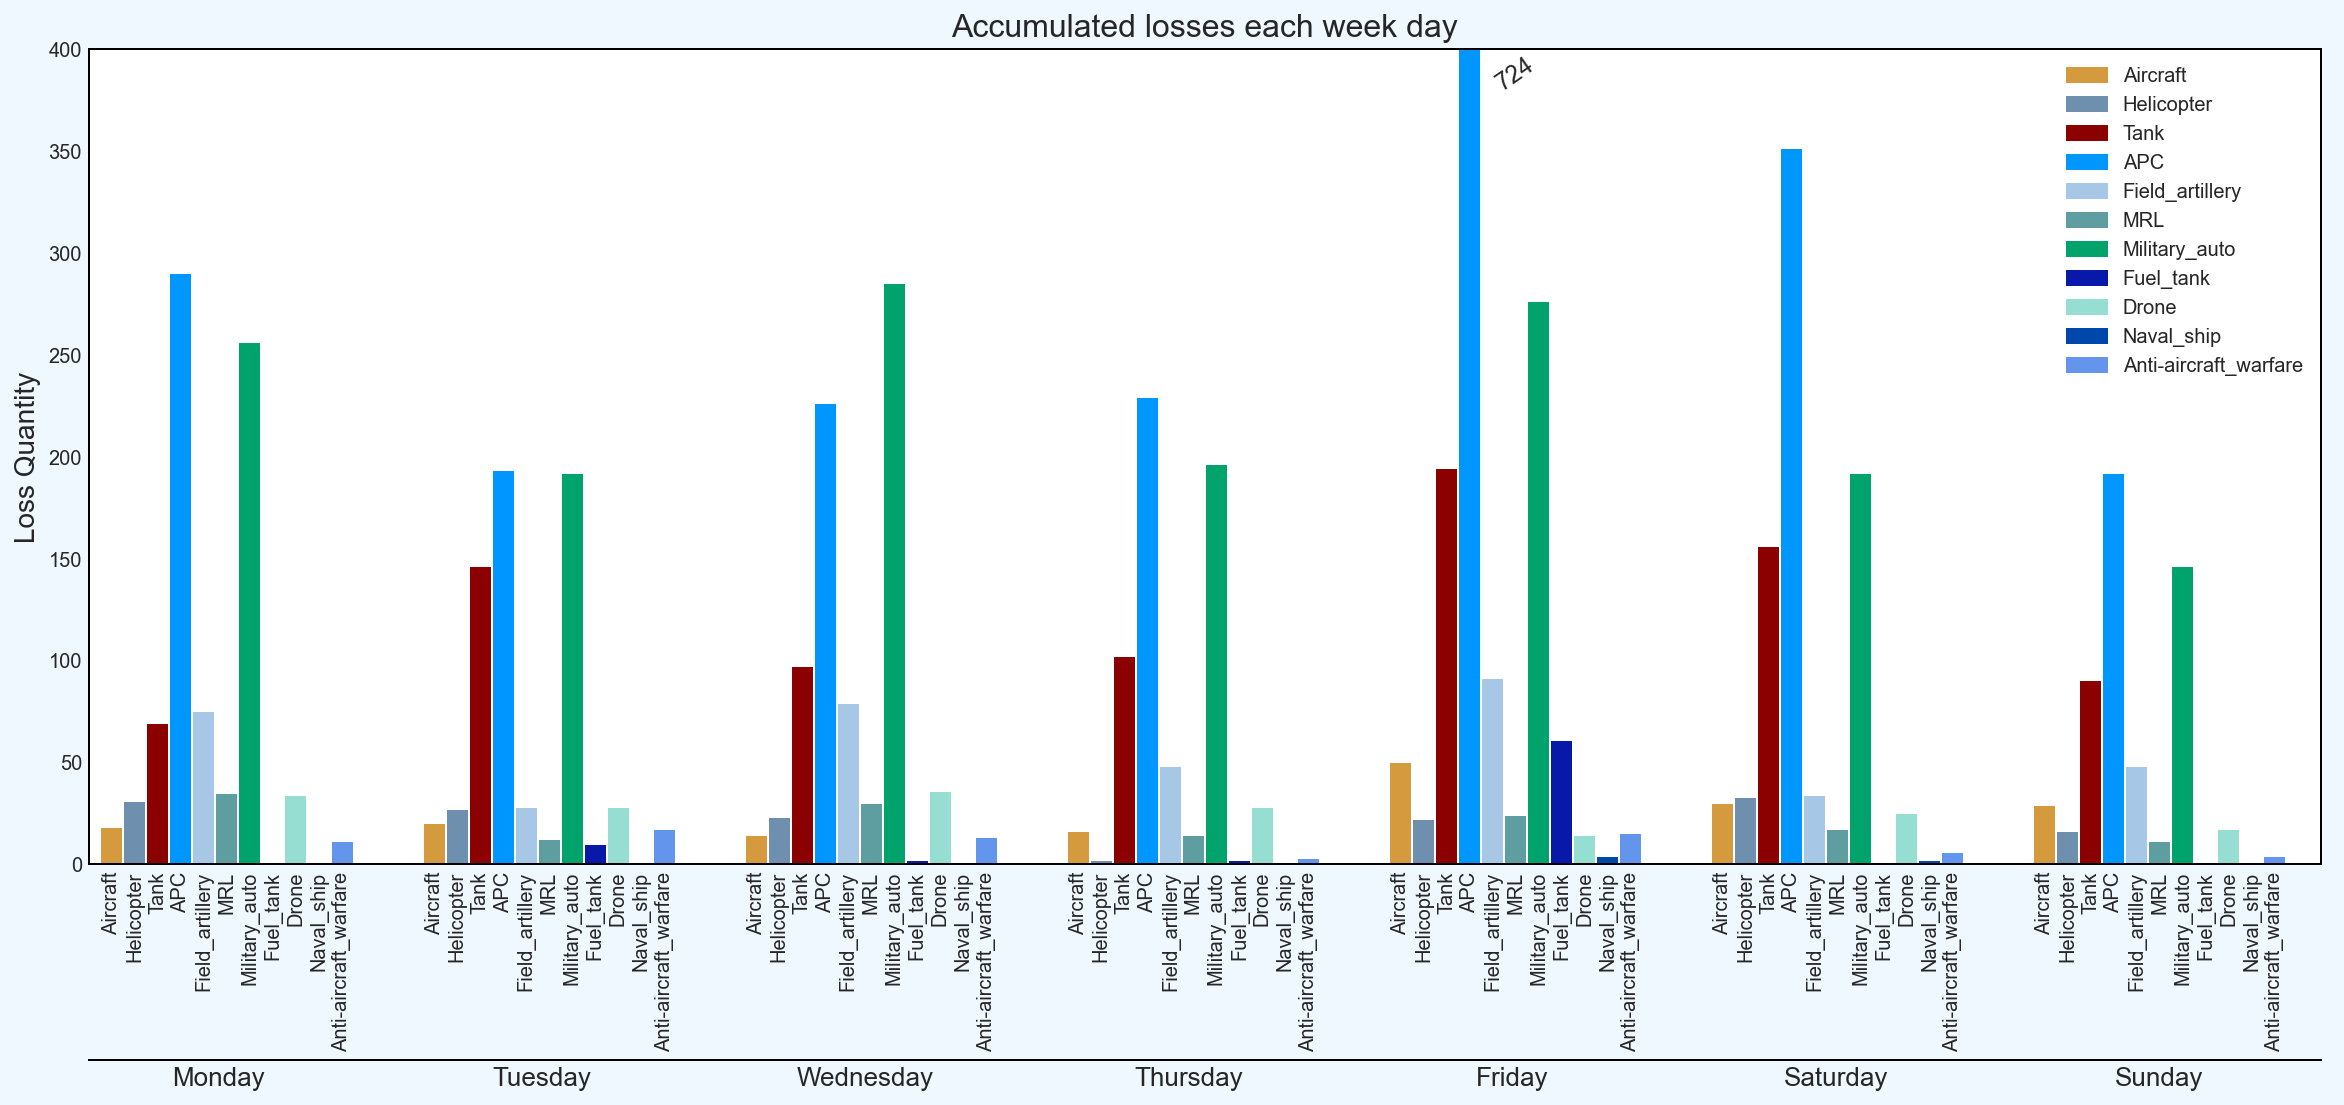

In [19]:
# Generating separation between each week into data into the x-axis
for i in range(3):
    weekday_sum_eqpt[f'sep{i}'] = [0 for x in range(len(weekday_sum_eqpt.index))]
bar_ticks = []
for i in range(7):
    cols = weekday_sum_eqpt.columns.tolist()
    j = 0
    while j < len(cols):
        if cols[j][:3] == 'sep':
            cols[j] = ' '
        j = j + 1
    bar_ticks += cols

day_yvals = []
for ind in weekday_sum_eqpt.index:
    for y_val in weekday_sum_eqpt.loc[ind].values:
        day_yvals.append(y_val)
day_xpos = [x for x in range(7*len(weekday_sum_eqpt.columns))]
    
# Generating repeating colors for all bars
bar_colors = []
colors = ['#D5993E', '#6F8FAF', '#8B0000', '#0096FF', '#A7C7E7', 
              '#5F9EA0', '#00A36C', '#0818A8', '#96DED1', '#0047AB',
              '#6495ED', '#800000', '#FFA500', '#191970']
for i in range(7):
    bar_colors += colors

# Mannually making patches for legend
legend_handles = []
for i, j in zip(bar_colors[:11], bar_ticks[:11]):
    patch = mpatches.Patch(color=i, label=j)
    legend_handles.append(patch)

# Main actual plot
fig = plt.figure(figsize=(20,7.5), facecolor='aliceblue')
ax = fig.add_subplot(111)

ax.bar(day_xpos, day_yvals, tick_label=bar_ticks, width = 1, linewidth = 1, color = bar_colors, gid = '')
ax.set_ylim(0, 400)
ax.set_xlim(-1,96)
ax.grid(axis='x')
ax.set_ylabel('Loss Quantity', fontsize=14)
ax.set_title('Accumulated losses each week day', fontsize= 16) 
ax.text(60, 380, r'724', fontsize=12, rotation = 35)

ax.set_xticklabels(bar_ticks, minor=False, rotation=90);
ax.legend(handles = legend_handles)

new_tick_locations = [j for j in range(7)]
ax2 = ax.twiny()
ax2.set_xlim(-.4, 6.5)

ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.spines["bottom"].set_position(("axes", -0.24))
ax2.grid(False)

ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(weekday_sum_eqpt.index, fontsize = 13);
ax.set_facecolor('white')

### Exploring the losses of all equipment in a week by week basis

In [ ]:
# TODO here

### Reported military personnel casualties in a week by week basis

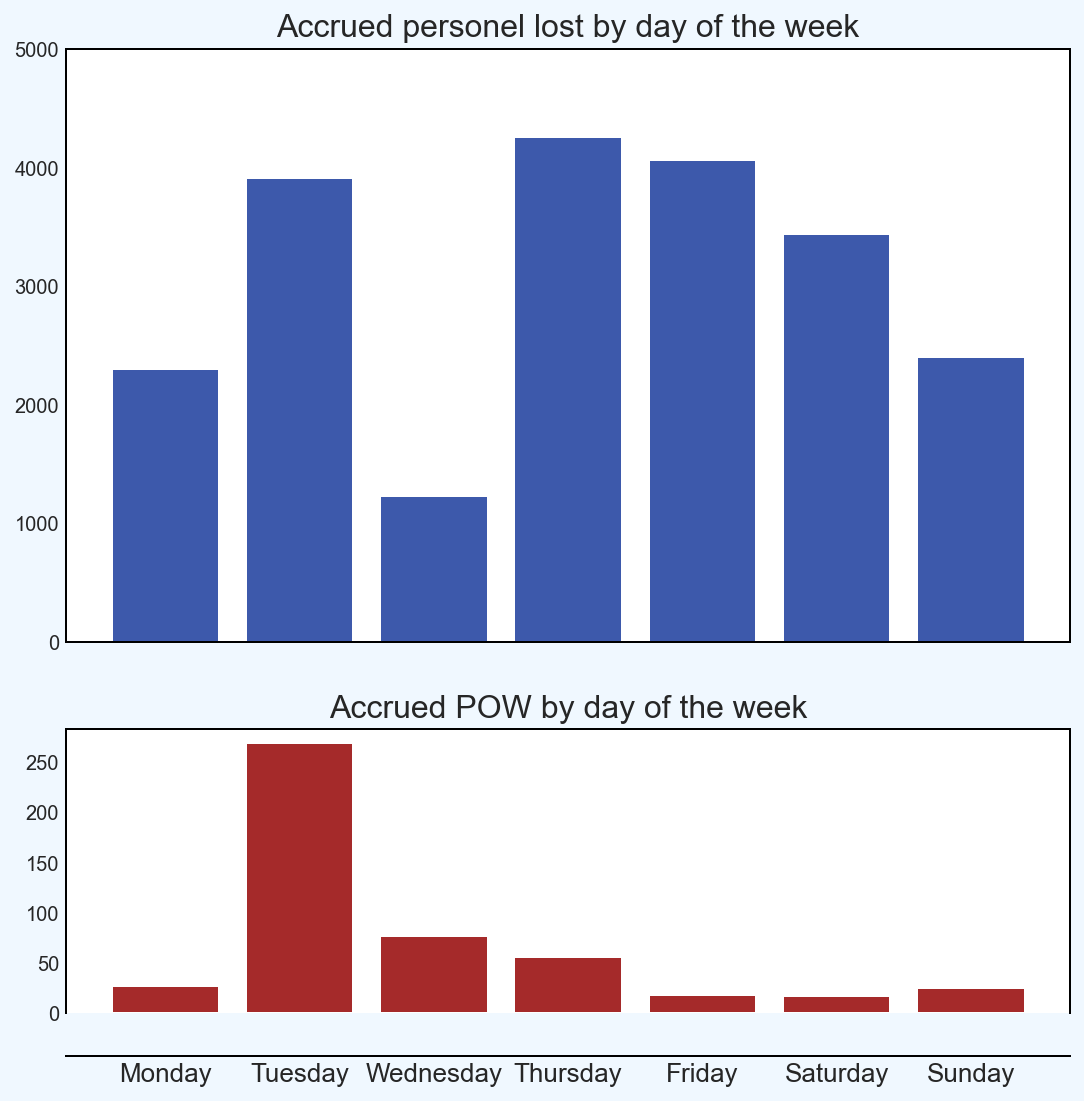

In [20]:
fig_pers = plt.figure(figsize=(9,12), facecolor='aliceblue')
ax1 = fig_pers.add_subplot(2, 1,1, facecolor='white')
ax2 = fig_pers.add_subplot(4, 1 ,3, facecolor='white')
ax1.bar(weekday_sum_psnl.index, weekday_sum_psnl.iloc[:, 0], width = .8, color = '#3D59AB')
ax1.set_xticklabels([])
ax1.set_title('Accrued personel lost by day of the week', fontsize=16)
ax1.set_ylim(0, 5000)
ax2.bar(weekday_sum_psnl.index, weekday_sum_psnl.iloc[:, 1], width = .8, color = '#A52A2A')
ax2.set_title('Accrued POW by day of the week', fontsize=16)
ax2.spines["bottom"].set_position(("axes", -0.15))
plt.xticks(fontsize=13);

,Personnel,POW
Week,,
wk 1,9000,200
wk 2,3000,171
wk 3,2000,34
wk 4,1800,7
wk 5,1700,47
wk 6,1400,8
wk 7,1000,10
wk 8,1100,12
wk 9,600,0


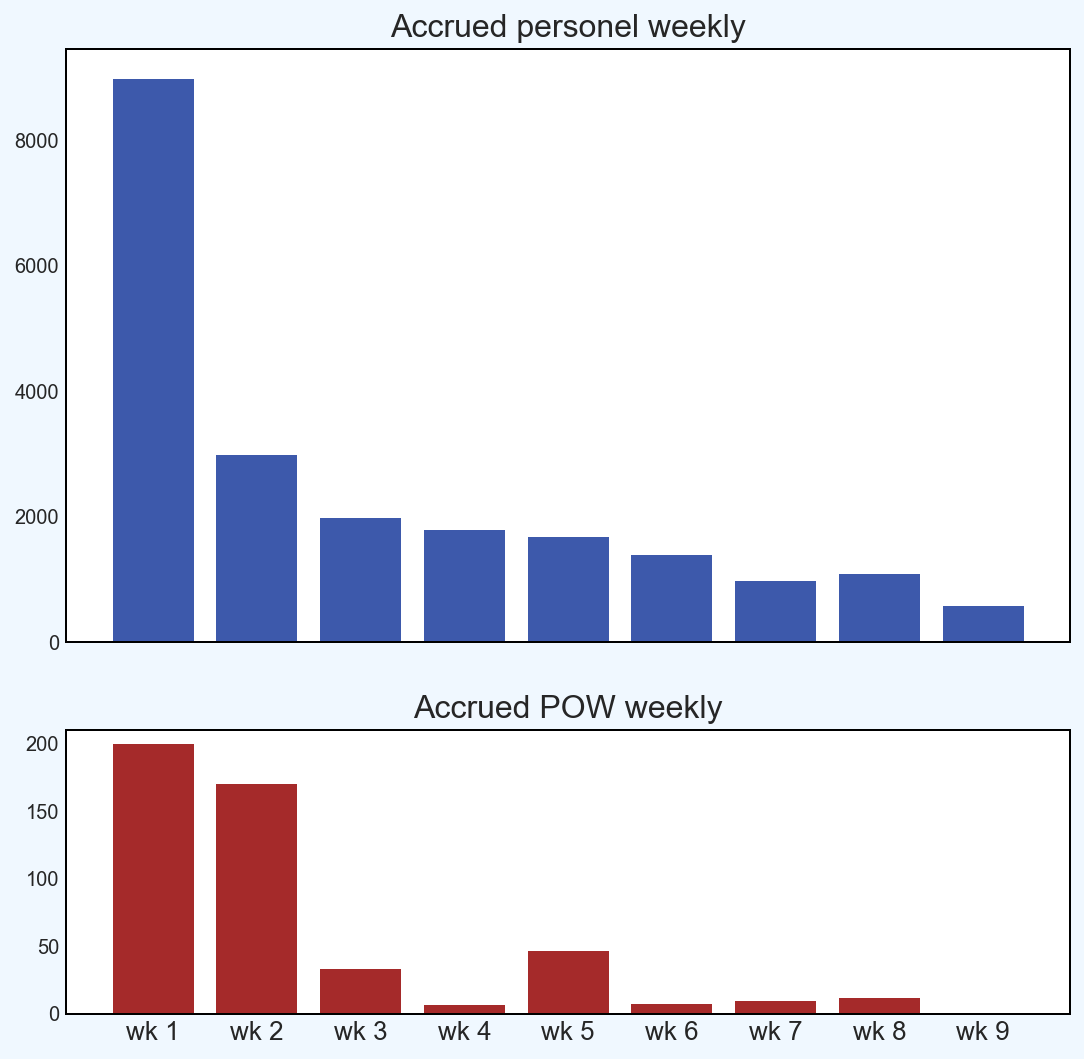

In [21]:
pers_weekly = df_daily.iloc[:, -4:]
pers_weekly = pers_weekly.groupby(['Week']).sum()
display(pers_weekly)
fig_pers = plt.figure(figsize=(9,12), facecolor='aliceblue')
ax1 = fig_pers.add_subplot(2, 1,1)
ax2 = fig_pers.add_subplot(4, 1 ,3)
ax1.bar(pers_weekly.index, pers_weekly.iloc[:, 0], width = .8, color = '#3D59AB')
ax2.bar(pers_weekly.index, pers_weekly.iloc[:, 1], width = .8, color = '#A52A2A')
ax1.set_xticklabels([])
ax1.set_title('Accrued personel weekly', fontsize=16)
ax2.set_title('Accrued POW weekly', fontsize=16)
plt.xticks(fontsize=13);
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Need to inspect personel losses for first and second week for the charts above

In [22]:
df_daily.head(2)

,Aircraft,Helicopter,Tank,APC,Field_artillery,MRL,Military_auto,Fuel_tank,Drone,Naval_ship,Anti-aircraft_warfare,Personnel,POW,Weekday,Week
date,,,,,,,,,,,,,,,
2022-02-25,10,7,80,516,49,4,100,60,0,2,0,2800,0,Friday,wk 1
2022-02-26,17,19,66,190,0,0,30,0,2,0,0,1500,0,Saturday,wk 1


In [23]:
weekly_corr_df = df_daily.copy()
weekly_corr_df.drop(columns=['Weekday'], inplace=True)
# weekly_corr_df['Week'] = weekly_corr_df['Week'].apply(lambda x: int(str(x)[-1]))
weekly_corr_df = pd.get_dummies(weekly_corr_df, ['Week']).corr()
weekly_corr_df = weekly_corr_df.iloc[:-9,-9:]

In [24]:
weekly_corr_df.head(50)

,Week_wk 1,Week_wk 2,Week_wk 3,Week_wk 4,Week_wk 5,Week_wk 6,Week_wk 7,Week_wk 8,Week_wk 9
Aircraft,0.133827,-0.036596,0.242278,0.009883,0.087348,-0.098567,-0.176032,-0.145046,-0.030522
Helicopter,0.158141,0.400185,0.107185,-0.032946,-0.147598,-0.185816,-0.122120,-0.147598,-0.052546
Tank,0.435803,0.057113,0.022687,-0.065291,-0.072942,-0.072942,-0.183871,-0.103543,-0.030378
APC,0.481118,-0.046391,0.048485,-0.079028,-0.097244,-0.083582,-0.143544,-0.088136,0.014859
Field_artillery,0.253805,-0.095957,0.180171,0.186307,-0.108229,-0.169591,-0.089821,-0.132774,-0.042688
MRL,0.378433,-0.049842,-0.019251,-0.111025,-0.049842,-0.080434,-0.049842,-0.049842,0.056499
Military_auto,0.311050,-0.056692,0.251416,-0.028532,-0.030188,-0.048410,-0.177616,-0.190868,-0.053846
Fuel_tank,0.340958,-0.061530,-0.061530,0.018968,-0.041405,-0.054822,-0.061530,-0.061530,-0.031386
Drone,-0.282373,-0.267484,-0.267484,0.253622,0.164290,0.089846,0.015402,0.149401,0.258485
Naval_ship,0.126316,0.004211,-0.117895,0.004211,0.248422,-0.117895,-0.117895,0.004211,-0.060138


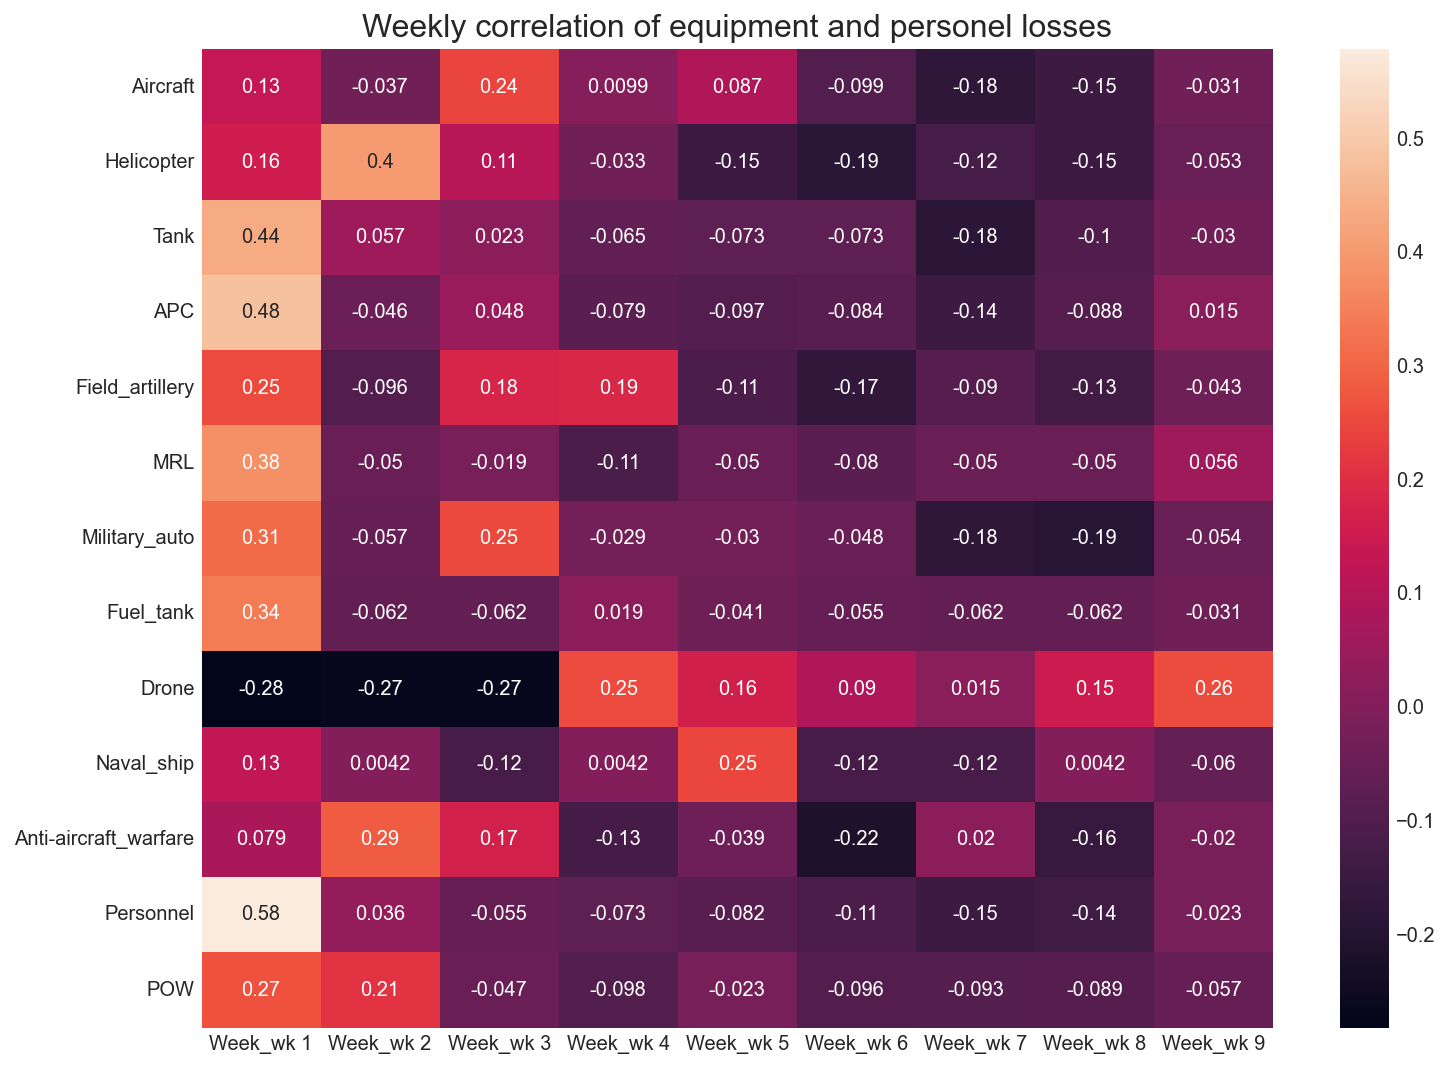

In [25]:
plt.figure(figsize=(12,9))
axw= plt.axes()
sns.heatmap(weekly_corr_df, annot=True)
axw.set_title('Weekly correlation of equipment and personel losses', fontsize=16);

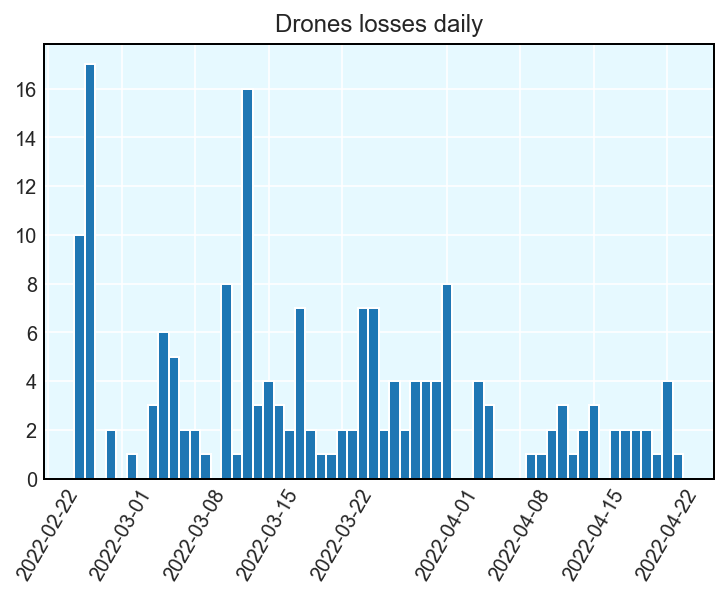

In [26]:
axd = plt.axes()
plt.bar(df_daily.index, df_daily['Aircraft'], width=1)
axd.set_title('Drones losses daily')
plt.xticks(rotation=60);

#### Assumptions of "Weekly correlation of equipment and personel losses"
- There seems to be a positive (moderate to high) correlation in the first week of combat. The heaviest overall losses seem to have ocurred here.

- Very few drones were lost in the first 3 weeks, and they seem to be the exception following the "overall trend" of equipment losses

- As we observed in the "Accrued personel and Accrued POW" bar charts, many of the causalties ocurred in the first week. The differentiation of this days with the following weeks is drastic, this explains the high correlation of 0.58

- Aircrafts and Aircraft equipment loss has slowed down drastically over the weeks

In [27]:
weekly_corr_df.corr()

,Week_wk 1,Week_wk 2,Week_wk 3,Week_wk 4,Week_wk 5,Week_wk 6,Week_wk 7,Week_wk 8,Week_wk 9
Week_wk 1,1.000000,0.128303,0.237770,-0.609447,-0.614193,-0.283015,-0.583134,-0.567845,-0.570360
Week_wk 2,0.128303,1.000000,0.311307,-0.621139,-0.418849,-0.745375,-0.044290,-0.537818,-0.562404
Week_wk 3,0.237770,0.311307,1.000000,-0.267707,-0.444809,-0.583235,-0.417006,-0.870340,-0.592615
Week_wk 4,-0.609447,-0.621139,-0.267707,1.000000,0.371053,0.467549,0.263964,0.551485,0.544106
Week_wk 5,-0.614193,-0.418849,-0.444809,0.371053,1.000000,0.438687,0.184437,0.649320,0.350806
Week_wk 6,-0.283015,-0.745375,-0.583235,0.467549,0.438687,1.000000,0.092648,0.704612,0.731384
Week_wk 7,-0.583134,-0.044290,-0.417006,0.263964,0.184437,0.092648,1.000000,0.514435,0.569832
Week_wk 8,-0.567845,-0.537818,-0.870340,0.551485,0.649320,0.704612,0.514435,1.000000,0.798091
Week_wk 9,-0.570360,-0.562404,-0.592615,0.544106,0.350806,0.731384,0.569832,0.798091,1.000000


In [28]:
corr_df = df_daily.copy()
corr_df = corr_df.iloc[:, :-1].corr()

Text(0.5, 1.0, 'Overall correlation of data')

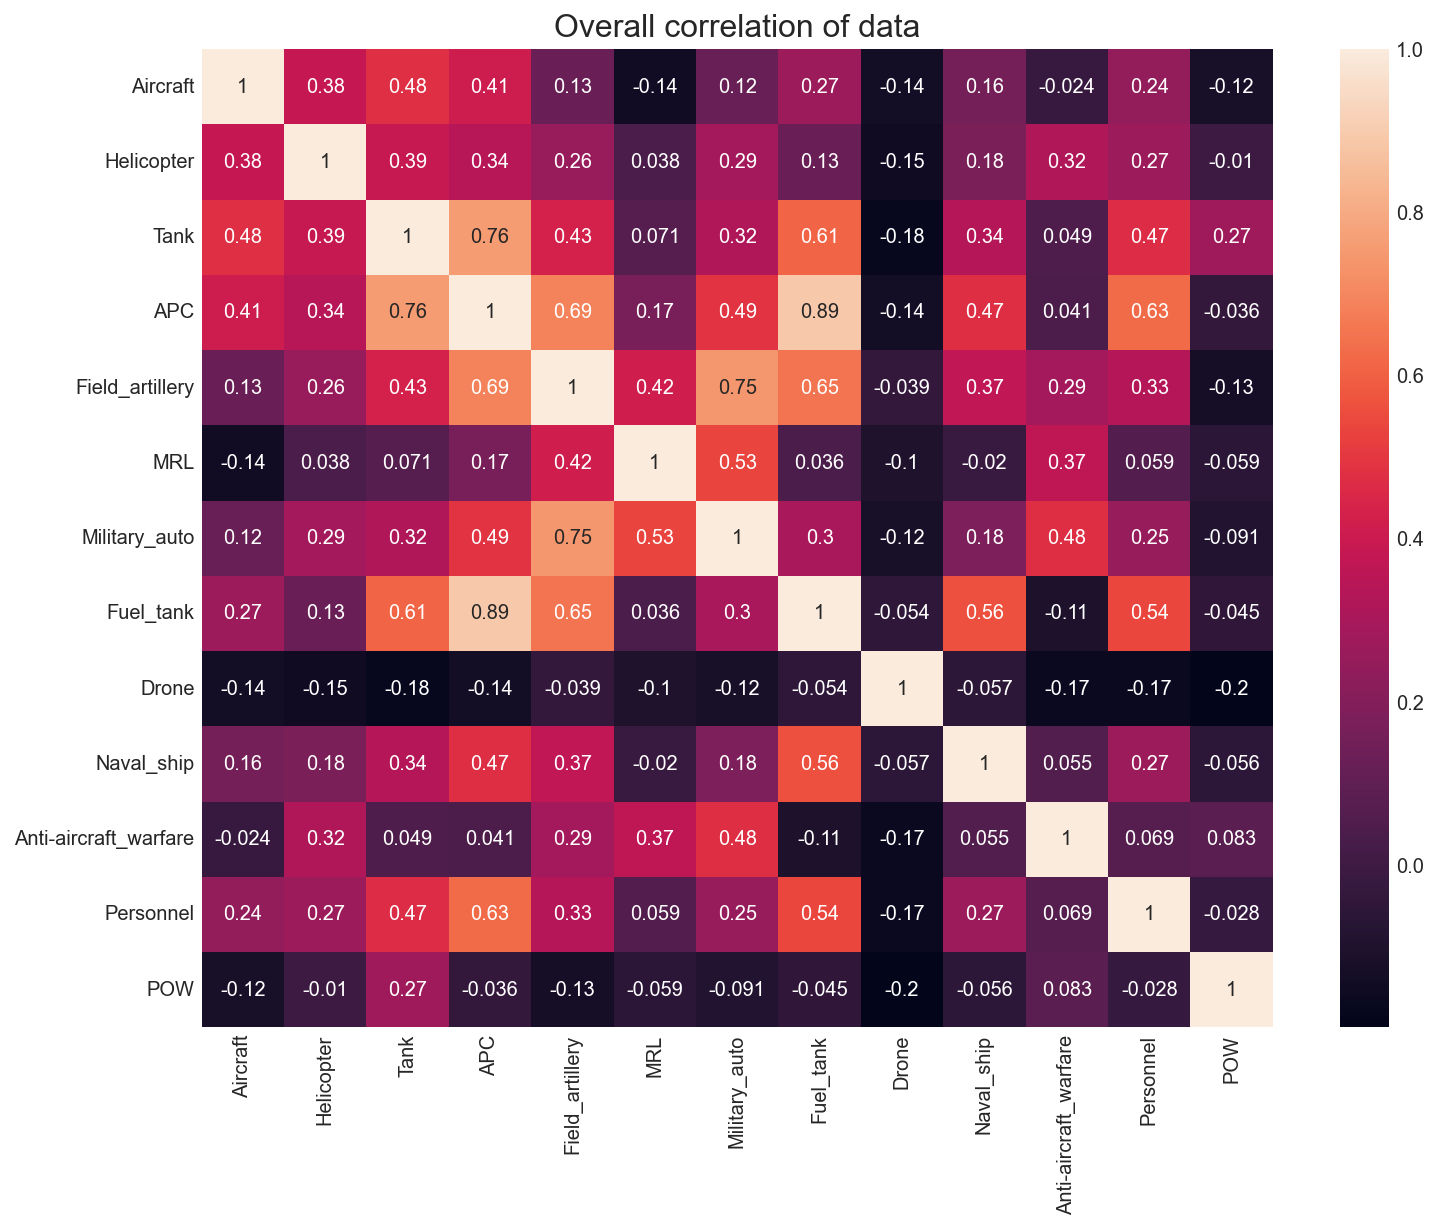

In [29]:
plt.figure(figsize=(12,9))
axes = plt.axes()
corrPlot = sns.heatmap(corr_df, annot=True)
axes.set_title('Overall correlation of data', fontsize=16)

#### Assumptions of "Overall correlation of data"

- Tanks, APC, and Fuel Tanks are all heavily correlated. This fact makes sense because these units of equipment are normally grouped together during relocation and even periods of assault

- Naval Ship correlates heavily with Tank fuel and moderately with APC equipment loss and field artillery. We could assume these units were being transported in naval ships that resulted in sunken casualties, however in the case of tank fuel the data points are scarce, therefore assumptions made here could be weaker and not as reliable in a correlation matrix.

- The correlation matrix displays a positive relationship between MRL (Multiple Rocket Launchers) and Anti-aircraft warfare. Nonetheless these equipments are of the same kind, it's safe to assume, anti-warfare equipment is usually grouped together whether in storage or transit. If a storage warehouse becomes destroyed, it will stipulate losses for both columns of the data. As we can see they are not necessarily casually related to one another, but rather, they both relate to the same external factor that influences their causation simply due to their nature. This occurrence in known as spurious correlation.

- Ground units such as Tanks, APC, and Fuel Tank are heavily correlated with personel loss. This makes sense because passenger carrying capacity is quite broad, including those that drive and operate machinery.


Text(0, 45, 'Correlation: 0.74506821')

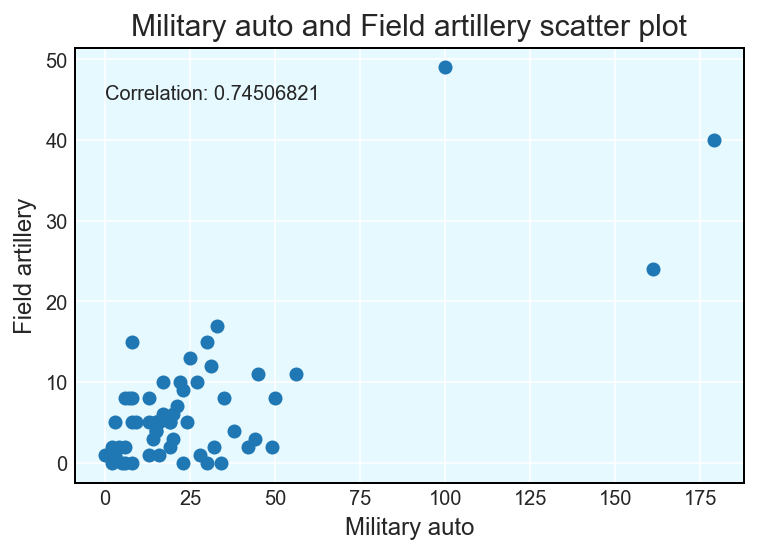

In [30]:
auto_arty = df_daily[['Military_auto','Field_artillery']]
ax = plt.axes()
plt.scatter('Military_auto', 'Field_artillery', data=auto_arty)
ax.set_xlabel('Military auto', fontsize=12)
ax.set_ylabel('Field artillery', fontsize=12)
ax.set_title('Military auto and Field artillery scatter plot', fontsize=15);
ax.text(y=45,x=0, s="Correlation: " + str(auto_arty.corr().iloc[:1, 1:].values)[2:-2])

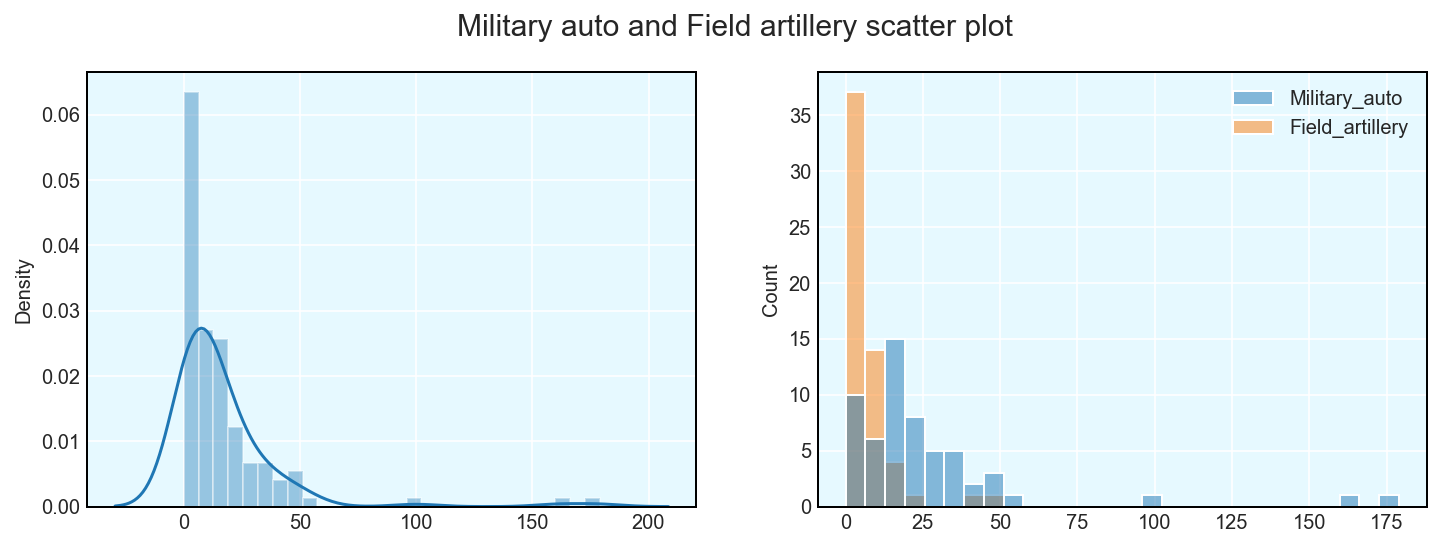

In [33]:
import warnings
warnings.filterwarnings('ignore')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.distplot(auto_arty, ax=ax1)
sns.histplot(auto_arty, ax=ax2)
fig.suptitle('Military auto and Field artillery scatter plot', fontsize=15);

Outlier data points removed: 3


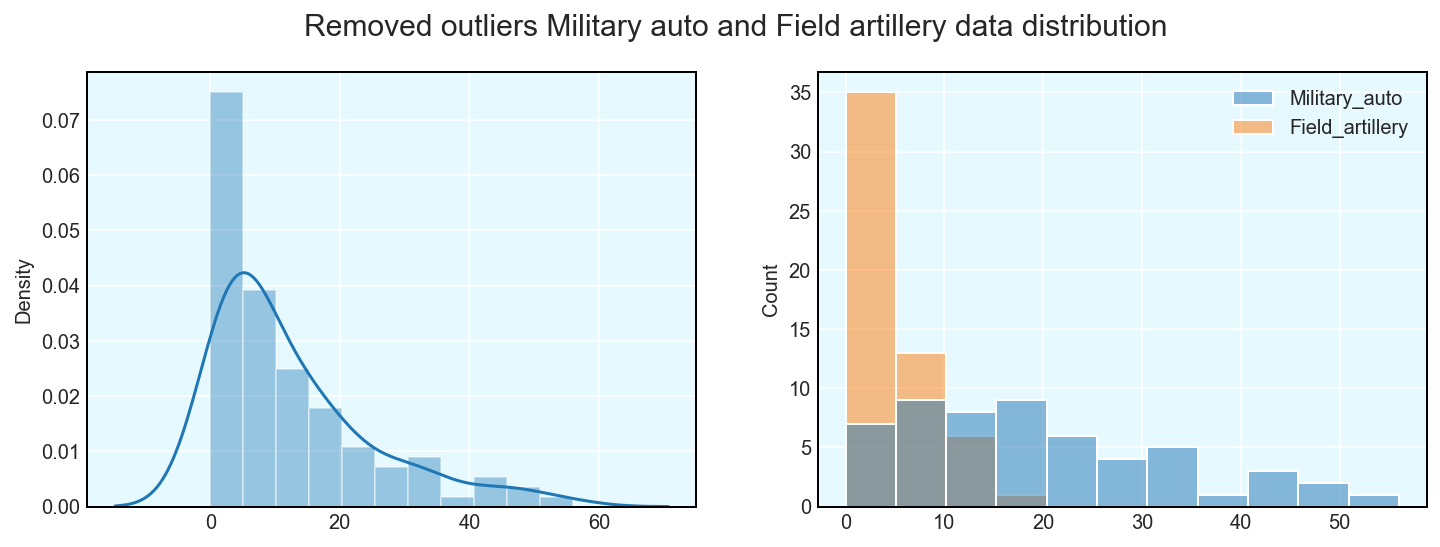

In [35]:
# Removing the most extreme data values found three standard deviations away from the mean
def reject_outliers(data, m=3):
    return data[abs(data - np.mean(data)) < m * np.std(data)]
auto_arty_rem_O = reject_outliers(auto_arty)
print(f'Outlier data points removed: {len(auto_arty_rem_O) - len(auto_arty_rem_O.dropna())}', end='\n')
auto_arty_rem_O.dropna(inplace=True)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
sns.distplot(auto_arty_rem_O, ax=ax1)
sns.histplot(auto_arty_rem_O, ax=ax2)
fig.suptitle('Removed outliers Military auto and Field artillery data distribution', fontsize=15);

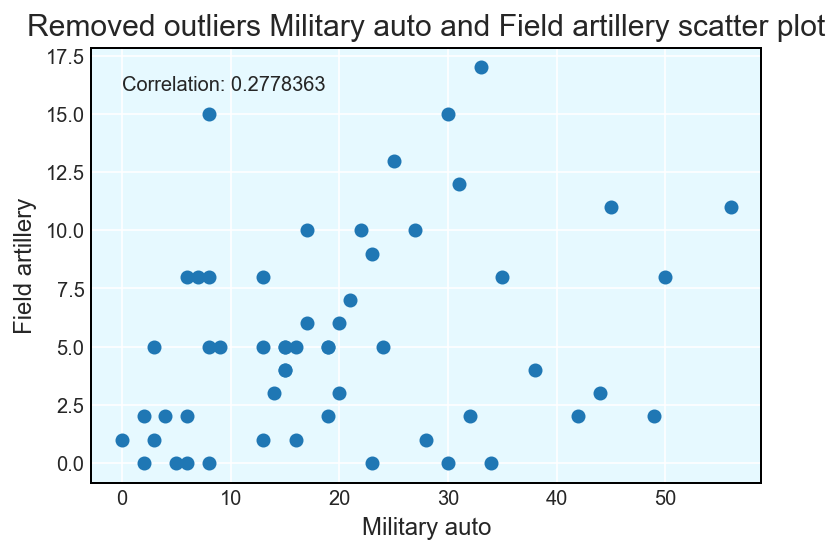

In [36]:
ax = plt.axes()
plt.scatter('Military_auto', 'Field_artillery', data=auto_arty_rem_O)
ax.set_xlabel('Military auto', fontsize=12)
ax.set_ylabel('Field artillery', fontsize=12)
ax.set_title('Removed outliers Military auto and Field artillery scatter plot', fontsize=15);
ax.text(y=16,x=0, s="Correlation: " + str(auto_arty_rem_O.corr().iloc[:1, 1:].values)[2:-2]);

### Exploring relationship correlation between Military auto and Field artillery

As we can see our correlation coefficient significantly diminished once we removed the 3 most extreme values of the data. The correlation among these two variables is now considered moderate. A linear regression can still be insightful but based in the points of the data we cannot expect to have a strong R squared value

The coefficient of determination for this model is 0.077


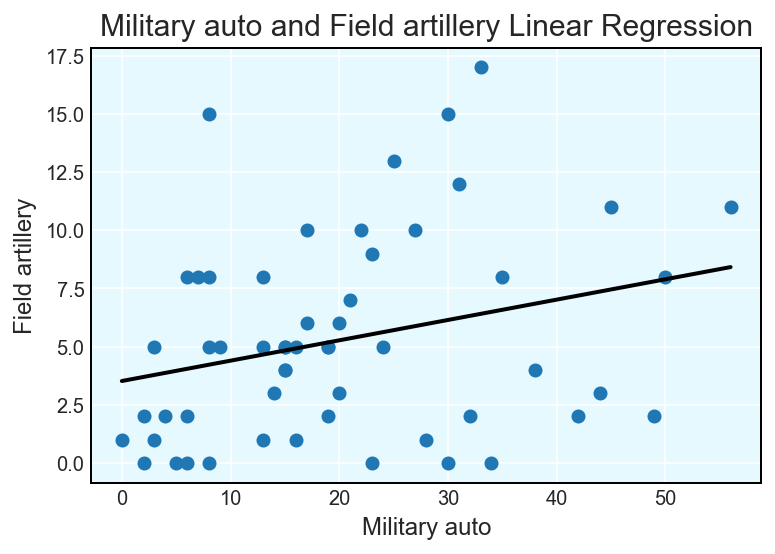

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x = auto_arty_rem_O['Military_auto'].values.reshape(-1, 1) 
y = auto_arty_rem_O['Field_artillery'].values.reshape(-1, 1) 
model.fit(x, y)
plt.figure(figsize=(6, 4))
ax = plt.axes()
ax.set_title('Military auto and Field artillery Linear Regression', fontsize=15)
ax.set_xlabel('Military auto', fontsize=12)
ax.set_ylabel('Field artillery', fontsize=12)
ax.scatter(x, y)

# predict y from the data
x_pred = np.linspace(0, max(np.squeeze(x)), 100).reshape(-1, 1)
y_pred = model.predict(np.squeeze(x_pred)[:, np.newaxis]).reshape(-1, 1)

ax.plot(x_pred, y_pred, color='black', linewidth=2)
print('The coefficient of determination for this model is ' + str(round(model.score(x, y), 3)))

Due to an very low coefficient of determination (R squared), we cannot conclude that there is a significant relationship between these two variables of data